# Сборный проект №1 "Исследование успешности компьютерных игр, продаваемых интернет-магазином"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем таблицу и изучим общую информацию

In [1]:
import matplotlib.pyplot as plt #загрузим библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#открываем файл
try:
    games = pd.read_csv('/Users/evgeniyakoreshilova/Desktop/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
games.head(20) #выведем первые 20 строчек таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info() #Посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

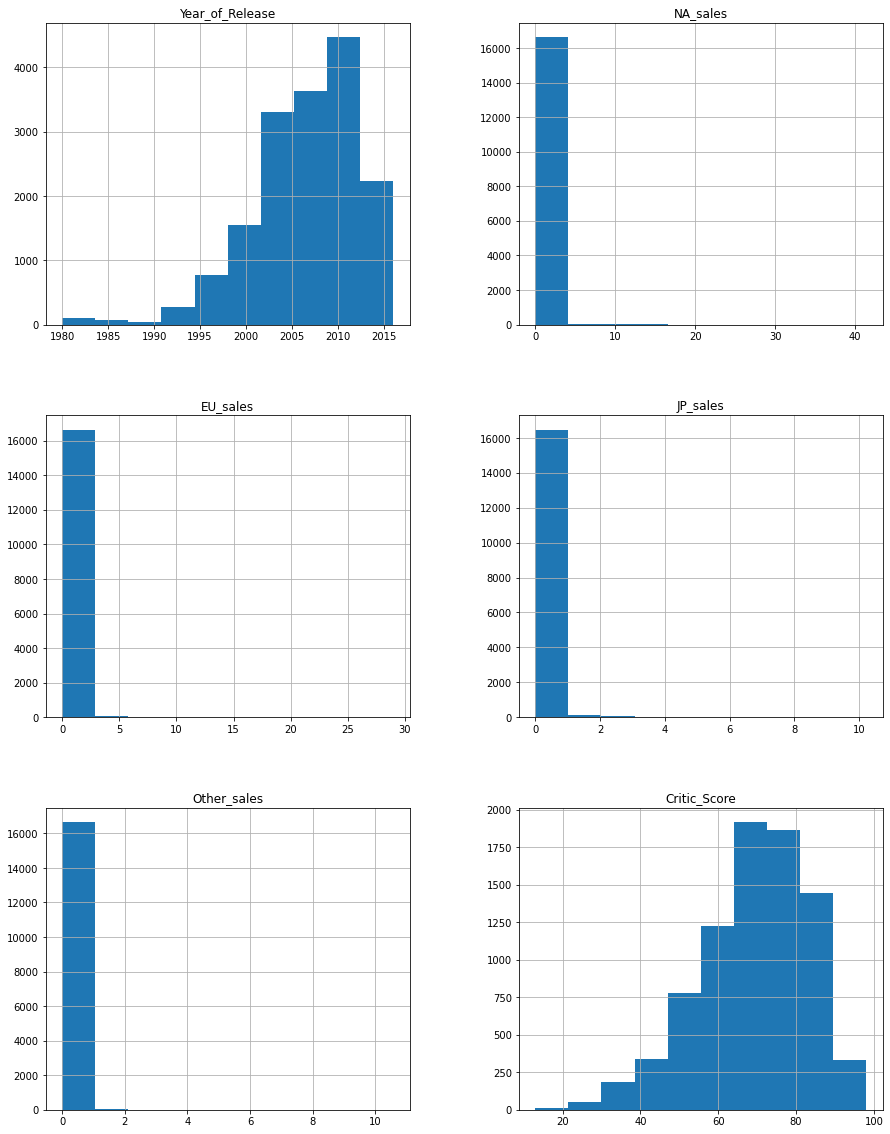

In [5]:
games.hist(figsize=(15, 20))

Пропуски есть в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Названия столбцов лучше привести к нижнему регистру. В столбцах Name, Platform, Year_of_Release, Genre, User_Score - по возможности изменить тип данных. Так как в столбце 'name' пропущено две строки, то их можно удалить, как и в столбце 'genre'.
Столбцы с пропущенными значениями Critic_Score, User_Score, Rating считаю, что нет необходимости заполнять. Данные могли быть пропущены, потому что о них нет информации в виду низкой популярности игр, или был сбой при выгрузке данных.

In [6]:
games.duplicated().sum() #Поищем явные дубликаты

0

In [7]:
games.columns = games.columns.str.lower() #Переименуем названия колонок: Приведем все к нижнему регистру

**Преобразуем данные в нужные типы**

In [8]:
games.query('name.isna()') # посмотрим в каких строках пропущено название

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Навание и жанр - пропущено в двух строках, их можно будет безболезненно удалить

In [9]:
games = games.dropna(subset=['name'])

Посмотрим на уникальные значения в столбце 'user_score'

In [10]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [11]:
len(games.query('user_score == "tbd"')) #Посмотрим сколько строк со значением tbd

2424

Гугл подсказывает, что сокращение tbd означает, что оценка пользователей будет определена. в данном случае ее можно заменить на Nan, при переводе данных в вещественный тип. Этот тип данных необходим для дальнейшей исследовательской работы.

In [12]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Переведем значения столбца 'year_of_release' в целое число. Так как значения содержат только год, переводить в дату - нецелесообразно. Тип int и визуально, и для исследования будет удобным.

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype('int') 

Создадим столбец в котором просуммируем все продажи

In [14]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [15]:
games['sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Проведем иследовательский анализ данных**

Посмотрим, сколько игр выпускалось в разные годы

<AxesSubplot:title={'center':'Количество выпущенных игр'}, xlabel='year_of_release'>

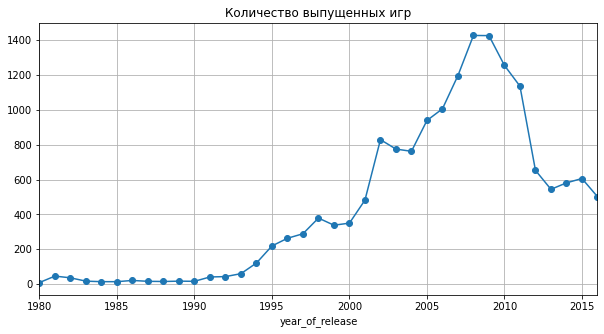

In [16]:
games.groupby('year_of_release')['name'].count().plot(style='o-', xlim=(1980, 2016), grid=True, figsize=(10, 5),\
                                                      title=('Количество выпущенных игр'))

Возьмем для анализа данные за период с 2000 по 2016 гг. Пик по выпуску игр приходится на период с 2007 по 2010 гг. С 2000 наблюдается рост, с 2010 по 2016 - спад.

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sales            16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [18]:
games_norm = games.query('year_of_release > 1999')

Выберем платформы с наибольшими суммарными продажами

array([<AxesSubplot:ylabel='sales'>], dtype=object)

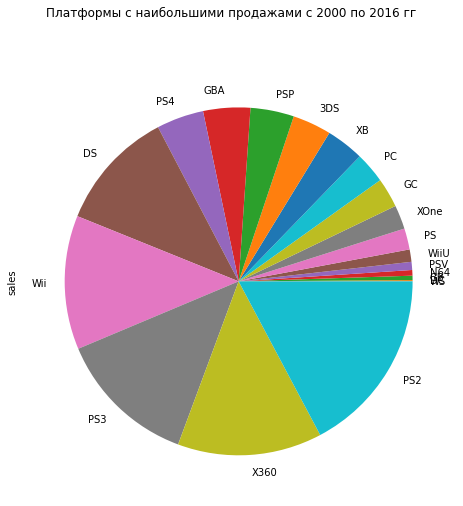

In [19]:
games_norm.pivot_table(index='platform', values='sales', aggfunc='sum')\
.sort_values('sales').plot(kind='pie', subplots=True, figsize=(8, 8),\
                           title="Платформы с наибольшими продажами с 2000 по 2016 гг", legend=False)


Посмотрим платформы PS по годам, чтобы увидеть, есть ли какая-то зависимость между ними

In [20]:
games_norm_all_ps = games_norm.query('platform == "PS" or platform == "PS2" or platform == "PS3" or platform == "PS4"\
                            or platform == "PSV"')

<AxesSubplot:xlabel='year_of_release'>

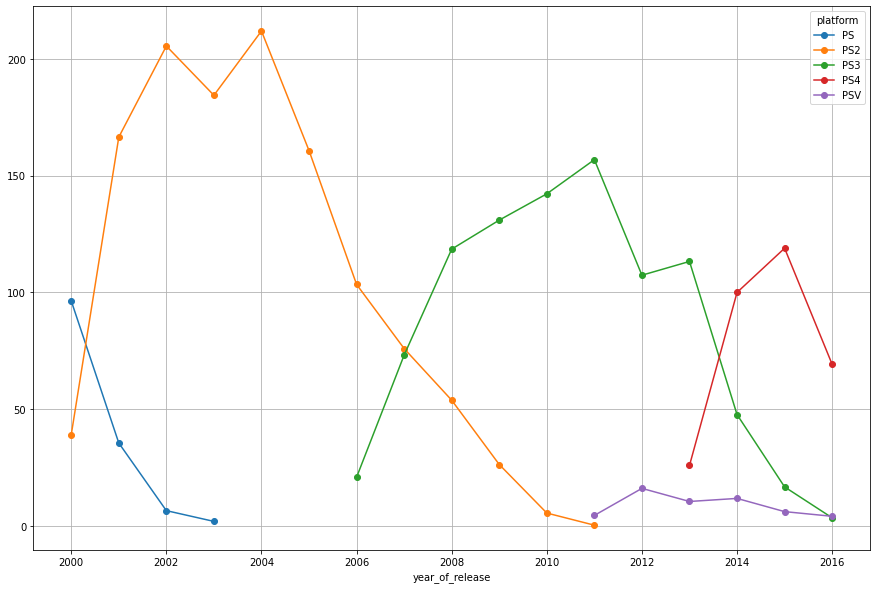

In [21]:
games_norm_all_ps.pivot_table(index='year_of_release', columns='platform',\
                                                values='sales', aggfunc='sum')\
.plot(style='o-', figsize=(15, 10), grid=True)

Посмотрим top-6 платформ по продажам по годам

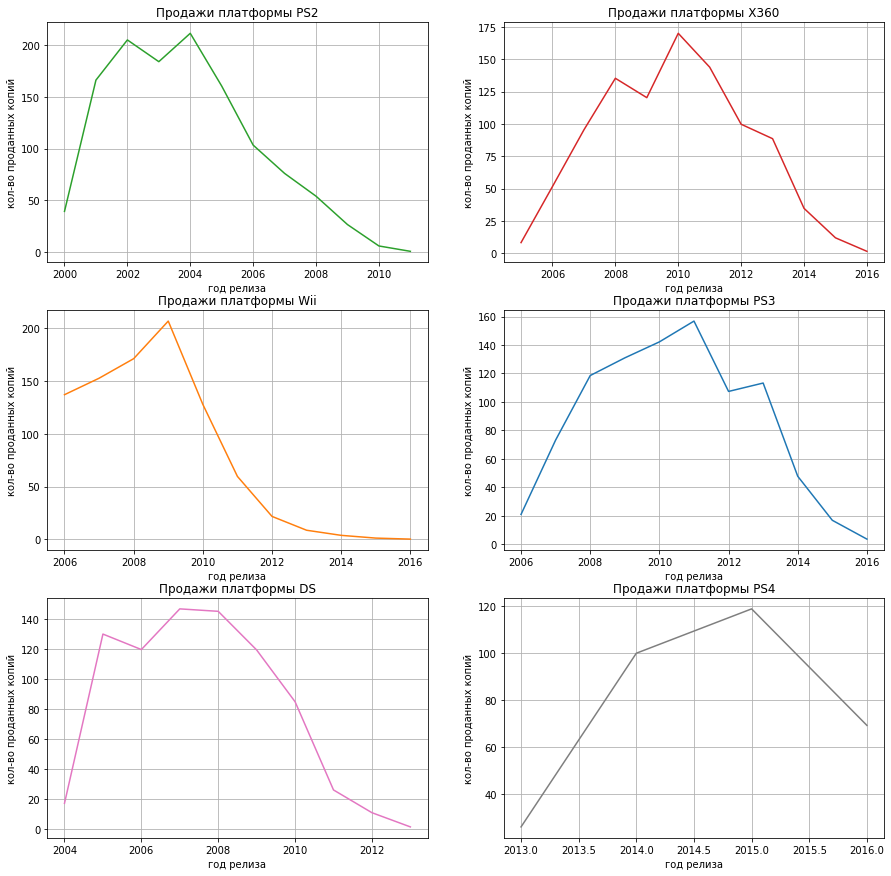

In [22]:
games_norm_ps2 = games_norm.query('platform == "PS2"').pivot_table(index='year_of_release',\
                                                values='sales', aggfunc='sum')
games_norm_x360 = games_norm.query('platform == "X360"').pivot_table(index='year_of_release',\
                                                values='sales', aggfunc='sum')
games_norm_ps3 = games_norm.query('platform == "PS3"').pivot_table(index='year_of_release',\
                                                values='sales', aggfunc='sum')
games_norm_wii = games_norm.query('platform == "Wii"').pivot_table(index='year_of_release',\
                                                values='sales', aggfunc='sum')
games_norm_ds = games_norm.query('platform == "DS"').pivot_table(index='year_of_release',\
                                                values='sales', aggfunc='sum')
games_norm_ps4 = games_norm.query('platform == "PS4"').pivot_table(index='year_of_release',\
                                                values='sales', aggfunc='sum')


fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(games_norm_ps2, 'tab:green')
axs[0, 0].set_title('Продажи платформы PS2')
axs[0, 1].plot(games_norm_x360, 'tab:red')
axs[0, 1].set_title('Продажи платформы X360')
axs[1, 0].plot(games_norm_wii, 'tab:orange')
axs[1, 0].set_title('Продажи платформы Wii')
axs[1, 1].plot(games_norm_ps3)
axs[1, 1].set_title('Продажи платформы PS3')
axs[2, 0].plot(games_norm_ds, 'tab:pink')
axs[2, 0].set_title('Продажи платформы DS')
axs[2, 1].plot(games_norm_ps4, 'tab:grey')
axs[2, 1].set_title('Продажи платформы PS4')
fig.set_size_inches(15, 15)
#fig.tight_layout()
for ax in axs.flat:
    ax.set(xlabel='год релиза', ylabel='кол-во проданных копий')
for ax in axs.flat:
    ax.grid()

    

График показывает, что платформы быстро стартуют, потом пик на год или два , спад и исчезновение. Исключение - платформа РС, не было ярко выраженного пика, только в период популярности компьютерных игр в период с 2010 по 2012. Платформа продолжает существовать.
Родственные платформы PS, PS2, PS3, PS4 - очень хорошо видно, что после пика одной платформы на следующий год появляется новая. Исключение - PSV. Может быть она не является частью глобальной системы PS. Продолжительность существования платформ - около 10 лет.
Учитывая эти данные, плюс тот факт, что пик продаж приходится на период с 2007 по 2010, для анализа возьмем актуальные данные, начиная с 2004 года.
    Посмотрим, какие платформы выпускали игры с 2004 года и какие активны в 2016 году.

In [23]:
games_norm_2004 = games_norm.query('year_of_release > 2003')
games_norm_2004.pivot_table(index='year_of_release', columns='platform',values='sales', aggfunc='sum')


platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2004,NaN,NaN,17.27,77.91,28.82,10.39,211.81,NaN,NaN,7.06,NaN,NaN,NaN,NaN,65.42,NaN
2005,NaN,NaN,130.14,33.86,27.62,4.37,160.66,NaN,NaN,43.84,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN


Получается, что наиболее перспективными на 2017 год можно считать платформы PS4, XOne, 3DS,PC. Продажи у всех платформ падают. Построим график "ящик с усами" по продажам игр в разбивке по этим платформам.

PS4

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales, dtype: float64


(0.0, 2.0)

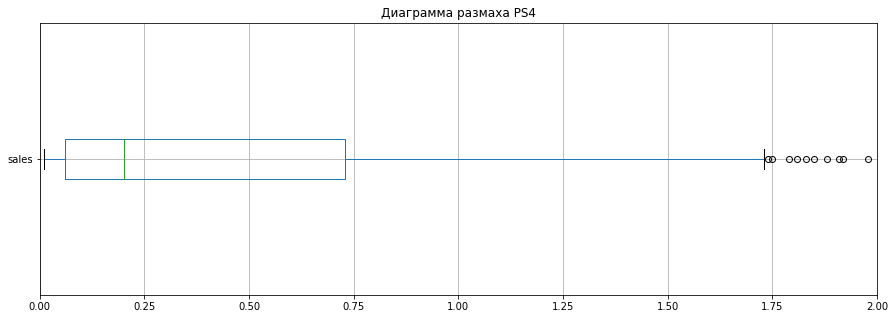

In [24]:
games_norm_2004_ps4 = games_norm_2004.query('platform == "PS4"')
print(games_norm_2004_ps4['sales'].describe())
games_norm_2004_ps4.boxplot(column='sales', figsize=(15, 5), vert=False)
plt.title('Диаграмма размаха PS4')
plt.xlim(0, 2)

Среднее значение - 0.8, медиана - 0.2 - это значит, что выбросы (значения выше 1.75) влияют на показатель среднего.

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales, dtype: float64


(0.0, 2.0)

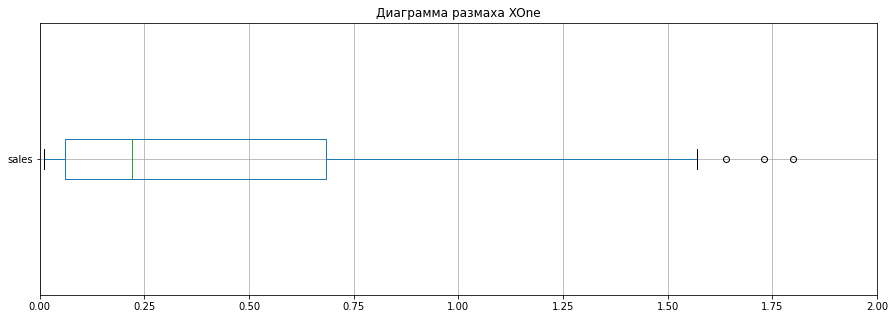

In [25]:
games_norm_2004_xone = games_norm_2004.query('platform == "XOne"')
print(games_norm_2004_xone['sales'].describe())
games_norm_2004_xone.boxplot(column='sales', figsize=(15, 5), vert=False)
plt.title('Диаграмма размаха XOne')
plt.xlim(0, 2)

Показатели аналогичны показателям предыдущего графика. Выбросы (значения выше 1.6) влияют на показатель среднего

count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: sales, dtype: float64


(0.0, 1.0)

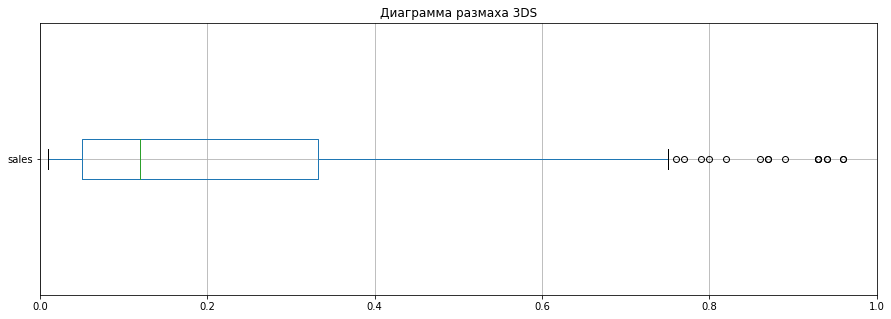

In [26]:
games_norm_2004_3ds = games_norm_2004.query('platform == "3DS"')
print(games_norm_2004_3ds['sales'].describe())
games_norm_2004_3ds.boxplot(column='sales', figsize=(15, 5), vert=False)
plt.title('Диаграмма размаха 3DS')
plt.xlim(0, 1)

Выбросы - значения больше 0.7

count    843.000000
mean       0.211364
std        0.570698
min        0.010000
25%        0.020000
50%        0.050000
75%        0.160000
max        8.010000
Name: sales, dtype: float64


(0.0, 0.5)

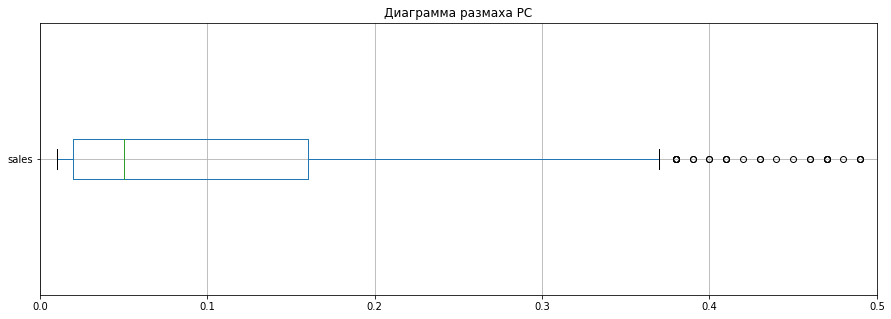

In [27]:
games_norm_2004_pc = games_norm_2004.query('platform == "PC"')
print(games_norm_2004_pc['sales'].describe())
games_norm_2004_pc.boxplot(column='sales', figsize=(15, 5), vert=False)
plt.title('Диаграмма размаха PC')
plt.xlim(0, 0.5)

Выбросы - значения больше 0.4

Посмотрим на корреляцию между отзывами и продажами на примере платформы - PS4

                 sales  critic_score  user_score
sales         1.000000      0.406568   -0.031957
critic_score  0.406568      1.000000    0.557654
user_score   -0.031957      0.557654    1.000000


Text(0.5, 0.98, 'График рассеивания PS4')

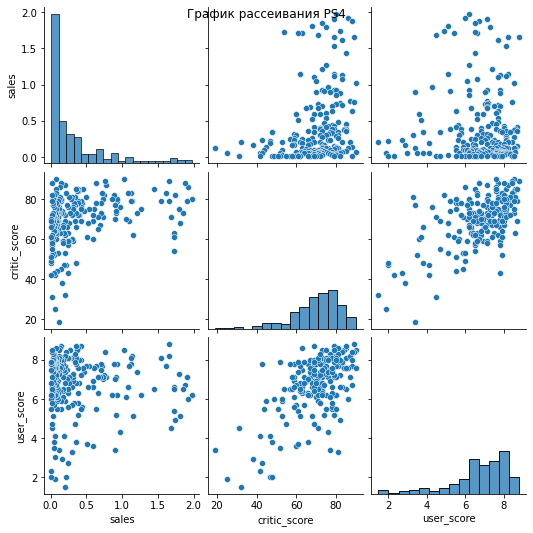

In [28]:
print(games_norm_2004_ps4[['sales', 'critic_score', 'user_score']].corr())
sns.pairplot(games_norm_2004_ps4[['sales', 'critic_score', 'user_score']].query('sales < 2'))
plt.suptitle('График рассеивания PS4')

Есть зависимость между отзывами критиков и продажами - почти 0.3. Корреляция между оценкой пользователей и продажами отсутствует.
На графиках - без учета выбросов - корреляция между продажами и отзывами как критиков, так и пользователей есть, но не слишком высокая.

Посмотрим на корреляцию между отзывами и продажами на примере платформы - XOne

                 sales  critic_score  user_score
sales         1.000000      0.416998   -0.068925
critic_score  0.416998      1.000000    0.472462
user_score   -0.068925      0.472462    1.000000


Text(0.5, 0.98, 'График рассеивания XOne')

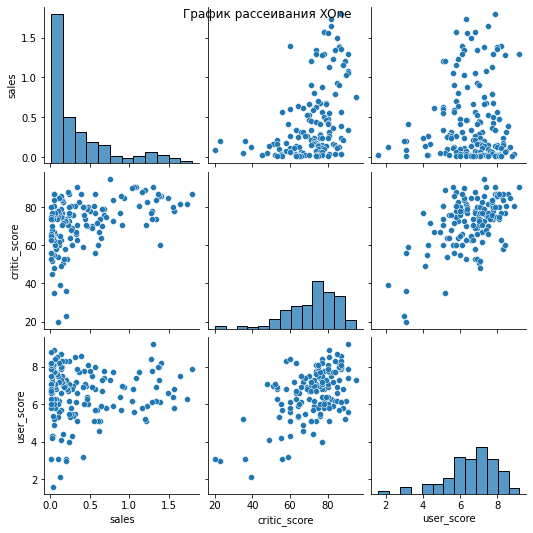

In [29]:
print(games_norm_2004_xone[['sales', 'critic_score', 'user_score']].corr())
sns.pairplot(games_norm_2004_xone[['sales', 'critic_score', 'user_score']].query('sales < 2'))
plt.suptitle('График рассеивания XOne')

Корреляция между отзывами критиков и продажами - 0.4, выше чем по предыдущей платформе. Оценки пользователей также не влияют на продажи.
Посмотрим на корреляцию между отзывами и продажами на примере платформы 3DS

                 sales  critic_score  user_score
sales         1.000000      0.348740    0.222078
critic_score  0.348740      1.000000    0.745222
user_score    0.222078      0.745222    1.000000


Text(0.5, 0.98, 'График рассеивания 3DS')

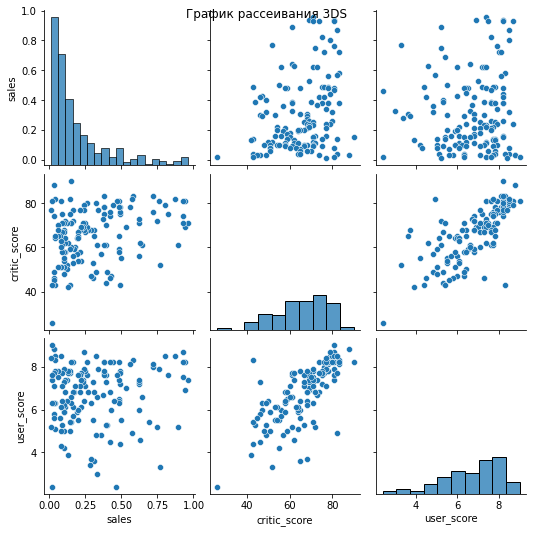

In [30]:
print(games_norm_2004_3ds[['sales', 'critic_score', 'user_score']].corr())
sns.pairplot(games_norm_2004_3ds[['sales', 'critic_score', 'user_score']].query('sales < 1'))
plt.suptitle('График рассеивания 3DS')

                 sales  critic_score  user_score
sales         1.000000      0.275124   -0.020402
critic_score  0.275124      1.000000    0.530679
user_score   -0.020402      0.530679    1.000000


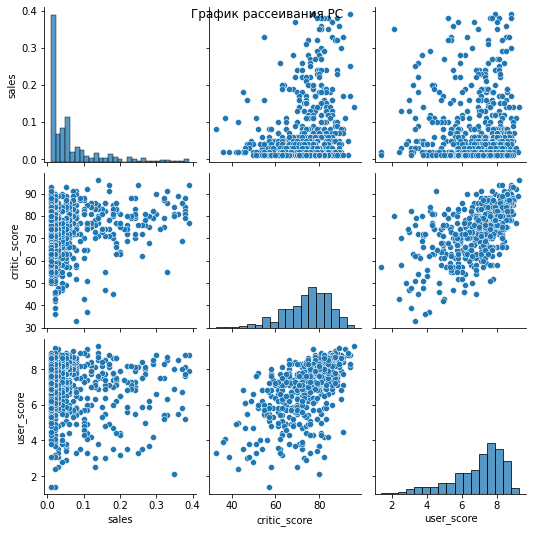

In [31]:
print(games_norm_2004_pc[['sales', 'critic_score', 'user_score']].corr())
sns.pairplot(games_norm_2004_pc[['sales', 'critic_score', 'user_score']].query('sales < 0.4'))
plt.suptitle('График рассеивания PC')
plt.show()

Корреляция аналогична примерам выше.
Таким образом, можно предположить, что отзывы критиков влияют на продажи, но не сильно. Отзывы пользователей чаще всего никак не влияют на продажи.

Посмотрим, как выглядят продажи по жанрам игр

In [32]:
games_norm_2004_genre_sum = games_norm_2004\
.pivot_table(index='genre', values='sales', aggfunc='median')\
.sort_values(by='sales', ascending=False)
games_norm_2004_genre_sum

,sales
genre,
Shooter,0.26
Platform,0.21
Sports,0.21
Action,0.17
Fighting,0.17
Racing,0.17
Role-Playing,0.15
Misc,0.14
Simulation,0.13


Игры с высокими продажами - это жанры - Shuter, Platform and Sports. Игры с самыми низкими продажами - это Adventure, Puzzle, Strategy

In [33]:
games_norm_2004_genre_count = games_norm_2004\
.pivot_table(index='genre', values='sales', aggfunc='count')\
.sort_values(by='sales', ascending=False)
games_norm_2004_genre_count

,sales
genre,
Action,2699
Sports,1489
Misc,1453
Role-Playing,1127
Adventure,1103
Shooter,921
Racing,709
Simulation,671
Fighting,495


Эти данные показывают, что больше всего выпускают игр Action. Игры жанра Adventure можно назвать самыми непопулярными - выпускают игр много, продажи не высокие.

**Составим портрет пользователя каждого региона**

NA

Возьмем данные за 2015 и 2016 год

In [34]:
games_norm_2015 = games_norm.query('year_of_release > 2014')

Определим 5 наиболее популярных платформ и жанров в Северной Америке

In [35]:
games_norm_2015.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False)\
    .head()

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


<AxesSubplot:title={'center':'Популяpные жанры в Северной Америке'}, xlabel='genre'>

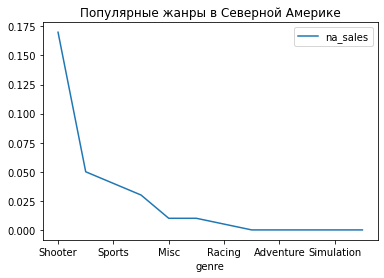

In [36]:
games_norm_2015.pivot_table(index='genre', values='na_sales', aggfunc='median')\
    .sort_values(by='na_sales', ascending=False)\
    .plot(title=('Популяpные жанры в Северной Америке'))

In [37]:
games_norm_2015.pivot_table(index='rating', values='na_sales', aggfunc='median')\
    .sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,0.08
E10+,0.05
E,0.03
T,0.03


EU

Определим 5 наиболее популярных платформ и жанров в Europe

In [38]:
games_norm_2015.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False)\
    .head()

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


<AxesSubplot:title={'center':'Популяpные жанры в Европе'}, xlabel='genre'>

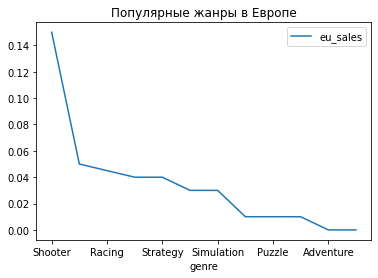

In [39]:
games_norm_2015.pivot_table(index='genre', values='eu_sales', aggfunc='median')\
    .sort_values(by='eu_sales', ascending=False)\
    .plot(title=('Популяpные жанры в Европе'))

In [40]:
games_norm_2015.pivot_table(index='rating', values='eu_sales', aggfunc='median')\
    .sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,0.080
E10+,0.060
E,0.040
T,0.035


JP

Определим 5 наиболее популярных платформ и жанров в Japan

In [41]:
games_norm_2015.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False)\
    .head()

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


<AxesSubplot:title={'center':'Популяpные жанры в Японии'}, xlabel='genre'>

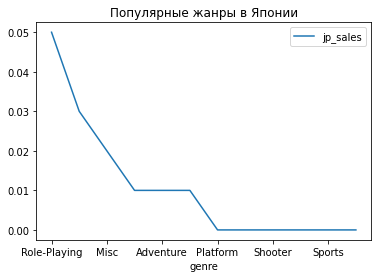

In [42]:
games_norm_2015.pivot_table(index='genre', values='jp_sales', aggfunc='median')\
    .sort_values(by='jp_sales', ascending=False)\
    .plot(title=('Популяpные жанры в Японии'))

In [43]:
games_norm_2015.pivot_table(index='rating', values='jp_sales', aggfunc='median')\
    .sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
E,0.0
E10+,0.0
M,0.0
T,0.0


Таким образом, во всех трех регионах можно выделить свои особенности:
    1) в Северной Америке и Европе жанровые предпочтения похожи. Самый популярный жанр - Shuter. В Японии самым востребованным жанром является - Role-Playing. Следующий жанр - Misc.
    2) Самой предпочитаемой платформой в трех регионах являются - PS4, 3DS. В Европе и Америке еще популярна XOne.
    3) рейтинг также влияет на продажи. Е, Т, М и Е10+ - самый востребованный рейтинг.
    

**Проверим гипотезы**

Подготовим таблицу для проверки гипотез. Исключим пропуски из столбца 'user_score'. Данные возьмем за два предыдущих года - 2015 и 2016.

In [44]:
games_norm_1 = games_norm_2015.dropna(subset=['user_score'])

1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны между собой.

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны между собой.
Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой.

In [45]:
from scipy import stats as st
games_xone = games_norm_1.query('platform == "XOne"')
games_pc = games_norm_1.query('platform == "PC" ')
alpha = 0.05
results = st.ttest_ind(games_xone['user_score'], games_pc['user_score'], equal_var = False)
print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Попробуем проверить и выведем среднее значение пользовательского рейтинга по этим двум платформам

In [46]:
print('Средний пользовательский рейтинг XOne', games_norm_1[games_norm_1['platform'] == "XOne"]['user_score'].mean())
print('Средний пользовательский рейтинг PC', games_norm_1[games_norm_1['platform'] == "PC"]['user_score'].mean())

Средний пользовательский рейтинг XOne 6.542148760330578
Средний пользовательский рейтинг PC 6.29642857142857


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Средние пользовательские рейтинги жанров Action и Sports разные
Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны между собой

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны между собой
Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные

In [48]:
games_action = games_norm_1.query('genre == "Action"')
games_sports = games_norm_1.query('genre == "Sports" ')
alpha = 0.05
results = st.ttest_ind(games_action['user_score'], games_sports['user_score'], equal_var = False)
print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Попробуем проверить и выведем среднее значение пользовательского рейтинга по этим двум жанрам

In [49]:
print('Средний пользовательский рейтинг Action', games_norm_1[games_norm_1['genre'] == "Action"]['user_score'].mean())
print('Средний пользовательский рейтинг Sports', games_norm_1[games_norm_1['genre'] == "Sports"]['user_score'].mean())

Средний пользовательский рейтинг Action 6.808290155440415
Средний пользовательский рейтинг Sports 5.198780487804878


Вывод: Средние пользовательские рейтинги жанров Action и Sports разные.

**Общий вывод**

    Для исследования нам была предоставлена таблица с данными, начиная с 1980 года. Согласно этим данным с 2000 года наблюдается рост в продаже компьютерных игр. Пик продаж приходится на 2007-2010 годы. С 2010 наблюдается спад популярности. Поэтому для исследовательского анализа нам подходит период с 2000 года.
    Самыми популярными платформами по продаже игр в этот период были: PS2, X360, PS3, Wii, DS.
    В 2016 году самыми продаваемыми платформами являются: PS4, XOne, 3DS, PC. Из них РС - дольше всех на рынке. Не было ярких взлетов и падений, показывают стабильный результат.
    Что касается жанра. Игры с высокими продажами - это жанры - Shooter, Platform, Sports. Игры с самыми низкими продажами - это Adventure, Puzzle, Strategy. При анализе конкретных регионов и учете данных за два последних года - картина несколько меняется. В Северной Америке и Европе самыми популярным жанром являются - Shuter, Racing (в Европе), Sports (в Америке), в Японии - Role-Playing. А также Adventure входит в топ-5 во всех трех регионах.
    Оценки пользователей никак не влияют на продажи, тогда как оценки критиков - имеют незначительное влияние.
    Востребованные ретинги: М, Е, Т, Е10.
    
    Таким образом, можно предположить, что в 2017 году будут популярны игры, выпущенные на платформах: PS4, XOne, 3DS, PC, в жанре - Shuter, Sports. Жанр Role-Playing - ориентировать на японскую публику. Рейтинг Е10 или М. Также возможно появление новой платформы PSVI, после того как продажи PSV пошли на спад.
